#### Data Load

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from matplotlib import font_manager

font_path = '../Ruda/Ruda-VariableFont_wght.ttf'
font_manager.fontManager.addfont(font_path)
prop = font_manager.FontProperties(fname=font_path)

plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = prop.get_name()

#### BARBIE1 PS

In [32]:
df = pd.read_csv('data/b1_ps/FINAL_RESULTS_MMPBSA.csv',skiprows=218)

In [33]:
df.columns

Index(['Frame #', 'BOND', 'ANGLE', 'DIHED', 'UB', 'IMP', 'CMAP', 'VDWAALS',
       'EEL', '1-4 VDW', '1-4 EEL', 'EGB', 'ESURF', 'GGAS', 'GSOLV', 'TOTAL'],
      dtype='object')

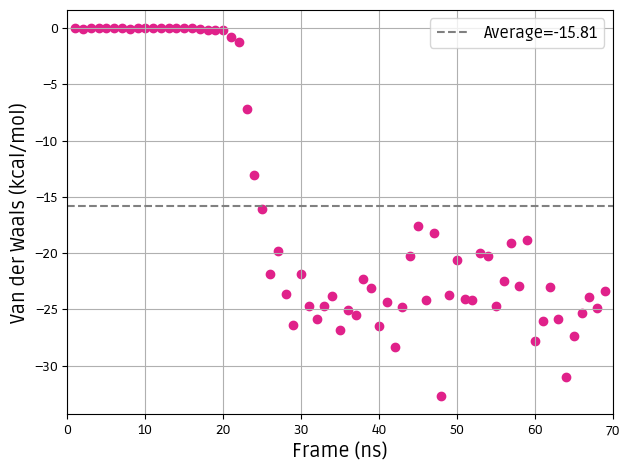

In [56]:
plt.scatter(df['Frame #'],df['VDWAALS'],color='#E0218A')
plt.xlabel('Frame (ns)',fontsize=14),plt.ylabel('Van der Waals (kcal/mol)',fontsize=14)
plt.xlim(0,70)

mean = np.mean(df['VDWAALS'])

plt.axhline(y=mean,linestyle='--',color='gray',label=f'Average={round(mean,2)}')

plt.legend(fontsize=12),plt.grid(),plt.tight_layout()
plt.savefig('results/b1_energy.png',dpi=500)
plt.show()

#### Spid PS

In [42]:
df1 = pd.read_csv('data/spid_ps/FINAL_RESULTS_MMPBSA.csv',skiprows=374)

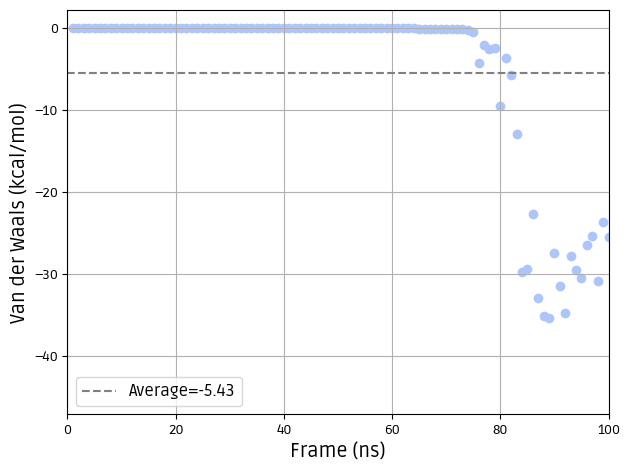

In [57]:
plt.scatter(df1['Frame #'],df1['VDWAALS'],color='#AEC5FB')
plt.xlabel('Frame (ns)',fontsize=14),plt.ylabel('Van der Waals (kcal/mol)',fontsize=14)
plt.xlim(0,100)

mean1 = np.mean(df1['VDWAALS'][:100])

plt.axhline(y=mean1,linestyle='--',color='gray',label=f'Average={round(mean1,2)}')

plt.legend(fontsize=12),plt.grid(),plt.tight_layout()
plt.savefig('results/spid_energy.png',dpi=500)
plt.show()

#### Energy Conversion

1 kcal = 2.6114E+22 eV

1 mol = 6.02214076×10²³

In [53]:
mean,mean1

(-15.811159420289856, -5.428400000000002)

In [54]:
def convert(e):
    
    eVmol = e*2.6114E+22
    eV = eVmol/6.02214076e23
    
    return round(eV,2)

In [55]:
convert(mean),convert(mean1)

(-0.69, -0.24)